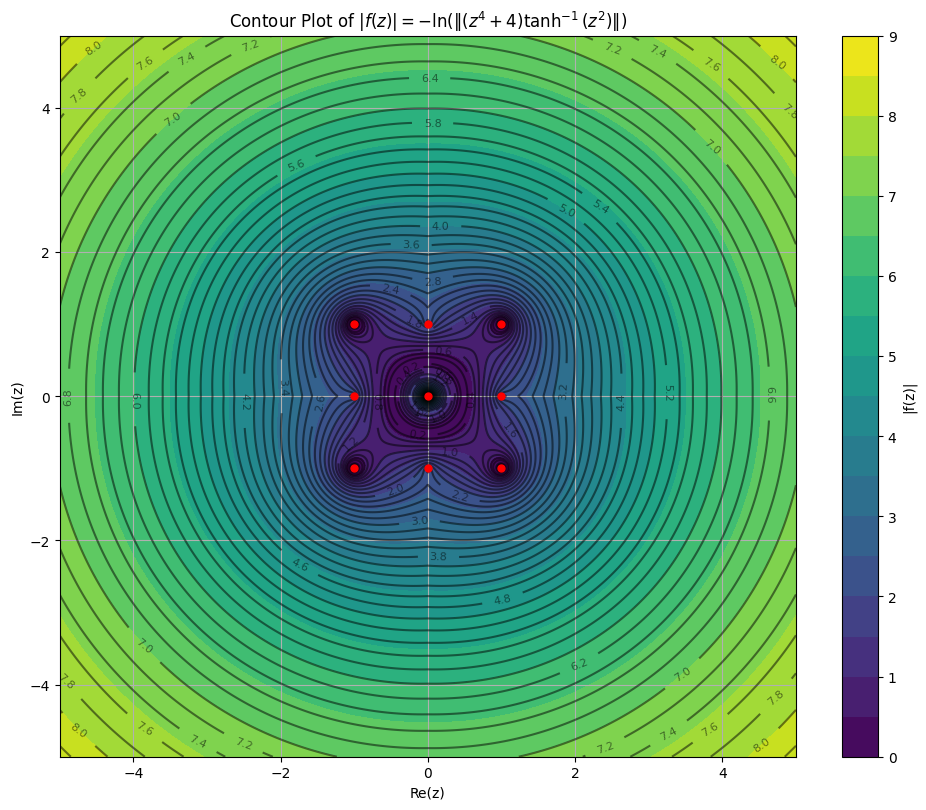

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.contour import QuadContourSet
from typing import Tuple

# Create a grid of complex values
real = np.linspace(-5, 5, 1000)
imag = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(real, imag)
Z = X + 1j*Y  # Complex grid

# Identify singular points
singular = np.any((np.abs(Z) < 1e-10) | (np.abs(Z) > 1e+10))
f_values = np.zeros_like(Z, dtype=complex)

def f(z):
    # See: ... (link to research report)
    return -np.log((np.abs((z**4 + 4) * np.atanh(z**2))))
    
f_values[~singular] = f(Z[~singular])
f_values[singular] = np.nan

magnitude = np.abs(f_values)
magnitude = np.clip(magnitude, -25, 25)


def contour_plot(
        M: np.ndarray,
        X: np.ndarray,
        Y: np.ndarray,
        sz: tuple = (10, 8)) -> Tuple[QuadContourSet, QuadContourSet]:
    
    ax, cf = plt.gca(), plt.gcf()
    contour = ax.contourf(X, Y, M, 20, cmap='viridis')
    contour_lines = ax.contour(X, Y, M, 50, colors='black', alpha=0.5)

    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.grid(True)
    contour_lines.clabel(inline=True, fontsize=8, fmt='%.1f')
    cf.set_size_inches(sz)
    cf.colorbar(contour, label='|f(z)|')

    cf.tight_layout()


contour_plot(magnitude, X, Y)
plt.title(r'Contour Plot of $|f(z)| = -\ln(\|(z^4 + 4)\tanh^{-1}(z^2)\|)$')
plt.plot(0, 0, 'ro', markersize=5, label='z=0')
plt.plot(1, 0, 'ro', markersize=5, label='z=1')
plt.plot(-1, 0, 'ro', markersize=5, label='z=-1')
plt.plot(0, 1, 'ro', markersize=5, label='z=i')
plt.plot(0, -1, 'ro', markersize=5, label='z=-i')
plt.plot(1, 1, 'ro', markersize=5, label='z=1 + i')
plt.plot(-1, 1, 'ro', markersize=5, label='z=-1 + i')
plt.plot(-1, -1, 'ro', markersize=5, label='z=-1 - i')
plt.plot(1, -1, 'ro', markersize=5, label='z=1 - i')


In [3]:
def print_crit_values(fn, *args):
    # Split into real, imaginary and complex valued
    cr, ci, z = [], [], []
    for a in args:
        if not isinstance(a, complex):
            return ValueError('Must provide complex valued args only!')
        if a.imag == 0:
            cr.append(a)
        elif a.real == 0:
            ci.append(a)
        else:
            z.append(a)

    with np.errstate(divide='ignore', invalid='ignore'):
        reals = [f'{_in} |-> {out}' for (_in, out) in zip(cr, map(fn, cr))]
        imags = [f'{_in} |-> {out}' for (_in, out) in zip(ci, map(fn, ci))]
        comps = [f'{_in} |-> {out}' for (_in, out) in zip(z, map(fn, z))]

        if reals:
            print(f'R: {" ".join(reals)}')
        if imags:
            print(f'I: {" ".join(imags)}')
        if comps:
            print(f'Z: {" ".join(comps)}')
        

# Let's check some critical values 
print_crit_values(f, 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

R: (1+0j) |-> -inf (-1+0j) |-> -inf 0j |-> inf
I: 1j |-> -inf (-0-1j) |-> -inf
Z: (1+1j) |-> inf (-1+1j) |-> inf (-1-1j) |-> inf (1-1j) |-> inf


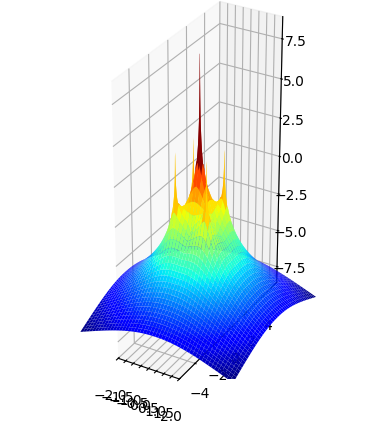

In [4]:
from matplotlib import cm


def freal(x, y):
    num = np.sqrt((x**2 - y**2 - 1)**2 + 4*x**2*y**2)
    denom = np.abs(np.atanh(1j*(x + 1j*y)))
    return np.log(num / denom)


U = f(X + 1j * Y)
# OR U = freal(X, Y)


def proj_plot(X, Y, U):
    ax = plt.axes(projection='3d')
    plt.xlim([-2, 2])

    ax.plot_surface(X, Y, U, cmap=cm.jet)
    ax.set_box_aspect( (np.diff(ax.get_xlim())[0],
                        np.diff(ax.get_ylim())[0],
                        np.diff(ax.get_zlim())[0]))
    ax.set_aspect('equal')


proj_plot(X, Y, U)

/tmp/ipykernel_2437/1792066830.py:10: RuntimeWarning: divide by zero encountered in log
  return 1/2 * np.log(G(r, theta)) - H(r, theta)


Text(0.5, 1.0, 'Contour Plot of polar function in unit circle')

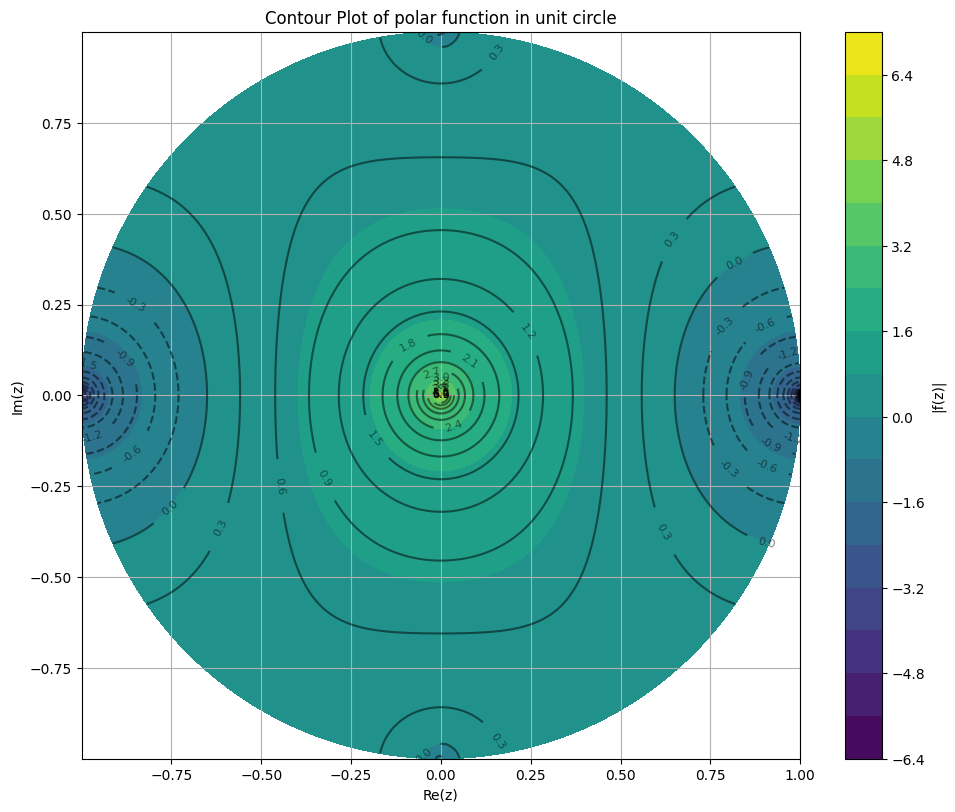

In [5]:
def G(r, theta):
    return r**4 - 2*r**2*np.cos(2 * theta) + 1


def H(r, theta):
    return np.log(np.abs(np.atanh(1j * r * np.exp(1j * theta))))


def fpolar(r, theta):
    return 1/2 * np.log(G(r, theta)) - H(r, theta)


r = np.linspace(0.001, 1, 1000)
theta = np.linspace(0, 2*np.pi, 300)
R, Theta = np.meshgrid(r, theta)

Z2 = fpolar(R, Theta)
X2 = R * np.cos(Theta)
Y2 = R * np.sin(Theta)

contour_plot(Z2, X2, Y2)
plt.title(r'Contour Plot of polar function in unit circle')

In [6]:
import sys
import functools


# Now let's try applying the gaussian function
def f2(z, f=None):
    gauss = np.exp(-z * np.conjugate(z))
    if f is not None:
        return gauss + f(z)
    return gauss

# Let's check the critical values still hold
print_crit_values(functools.partial(f2, f=f), 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

# What does the 'limit' look like around the complex poles ?
print('\nLimit\'s around complex poles:')
epsilon = sys.float_info.epsilon
md = 1.0 - epsilon
print_crit_values(functools.partial(f2, f=f), md + 1j, md - 1j, 1 + md*1j, 1 - md*1j, md + md*1j, md - md*1j)

# What does the 'limit' look like around zero ?
print('\nLimit\'s around 0:')
print_crit_values(functools.partial(f2, f=f), epsilon + 0j, epsilon - 0j, epsilon * 1j, epsilon * -1j)

R: (1+0j) |-> (-inf+0j) (-1+0j) |-> (-inf+0j) 0j |-> (inf+0j)
I: 1j |-> (-inf+0j) (-0-1j) |-> (-inf+0j)
Z: (1+1j) |-> (inf+0j) (-1+1j) |-> (inf+0j) (-1-1j) |-> (inf+0j) (1-1j) |-> (inf+0j)

Limit's around complex poles:
Z: (0.9999999999999998+1j) |-> (33.65118555260659+0j) (0.9999999999999998-1j) |-> (33.65118555260659+0j) (1+0.9999999999999998j) |-> (33.65118555260659+0j) (1-0.9999999999999998j) |-> (33.65118555260659+0j) (0.9999999999999998+0.9999999999999998j) |-> (33.30461196232662+0j) (0.9999999999999998-0.9999999999999998j) |-> (33.30461196232662+0j)

Limit's around 0:
R: (2.220446049250313e-16+0j) |-> (71.70101241711443+0j) (2.220446049250313e-16+0j) |-> (71.70101241711443+0j)
I: 2.220446049250313e-16j |-> (71.70101241711443+0j) -2.220446049250313e-16j |-> (71.70101241711443+0j)


Text(0.5, 1.0, 'Contour Plot of $|f(z)| = \\mathcal{CN}(0, \\sigma^2) - \\ln\\left(\\left\\|(z^4 + 4)\\tanh^{-1}(z^2)\\right\\|\\right)$')

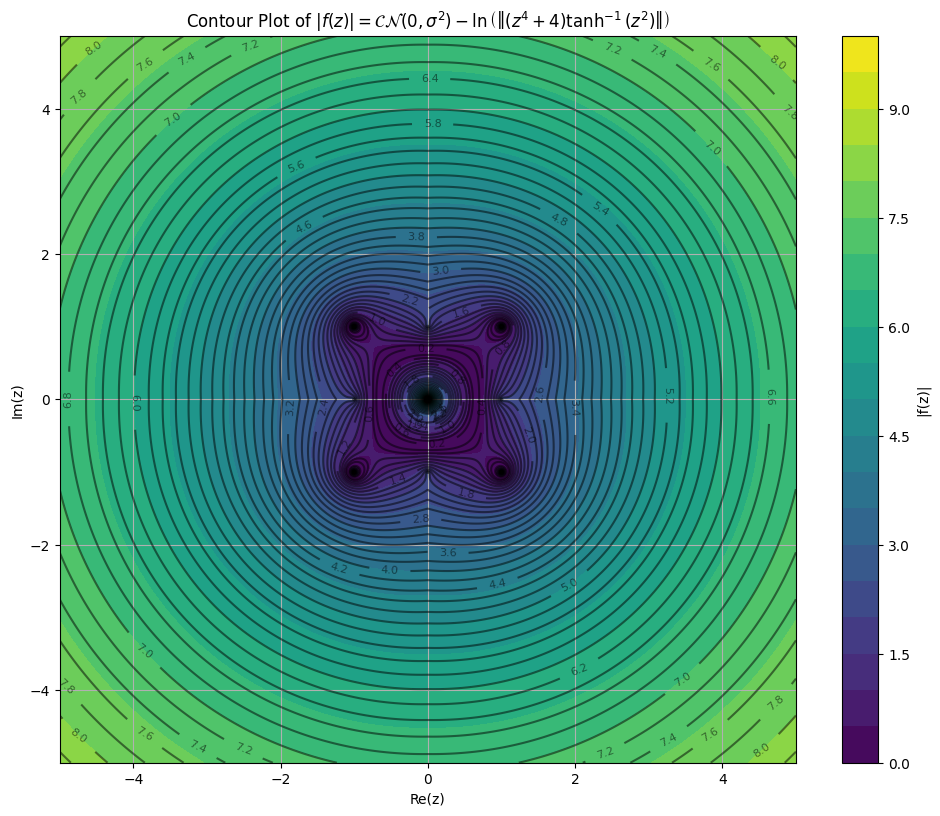

In [7]:
f_values = np.zeros_like(Z, dtype=complex)
f_values= f2(Z, f)
magnitude = np.abs(f_values)

contour_plot(magnitude, X, Y)
plt.title(r'Contour Plot of $|f(z)| = \mathcal{CN}(0, \sigma^2) - \ln\left(\left\|(z^4 + 4)\tanh^{-1}(z^2)\right\|\right)$')

/home/tophurt/Desktop/Thesis/.venv/lib/python3.11/site-packages/matplotlib/contour.py:1364: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/tophurt/Desktop/Thesis/.venv/lib/python3.11/site-packages/matplotlib/contour.py:1365: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/tophurt/Desktop/Thesis/.venv/lib/python3.11/site-packages/numpy/ma/core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,



Critical values should remain when taking the limit
R: (1+0j) |-> (-inf+0j) (-1+0j) |-> (-inf+0j) 0j |-> (inf+0j)
I: 1j |-> (-inf+0j) (-0-1j) |-> (-inf+0j)
Z: (1+1j) |-> (inf+0j) (-1+1j) |-> (inf+0j) (-1-1j) |-> (inf+0j) (1-1j) |-> (inf+0j)


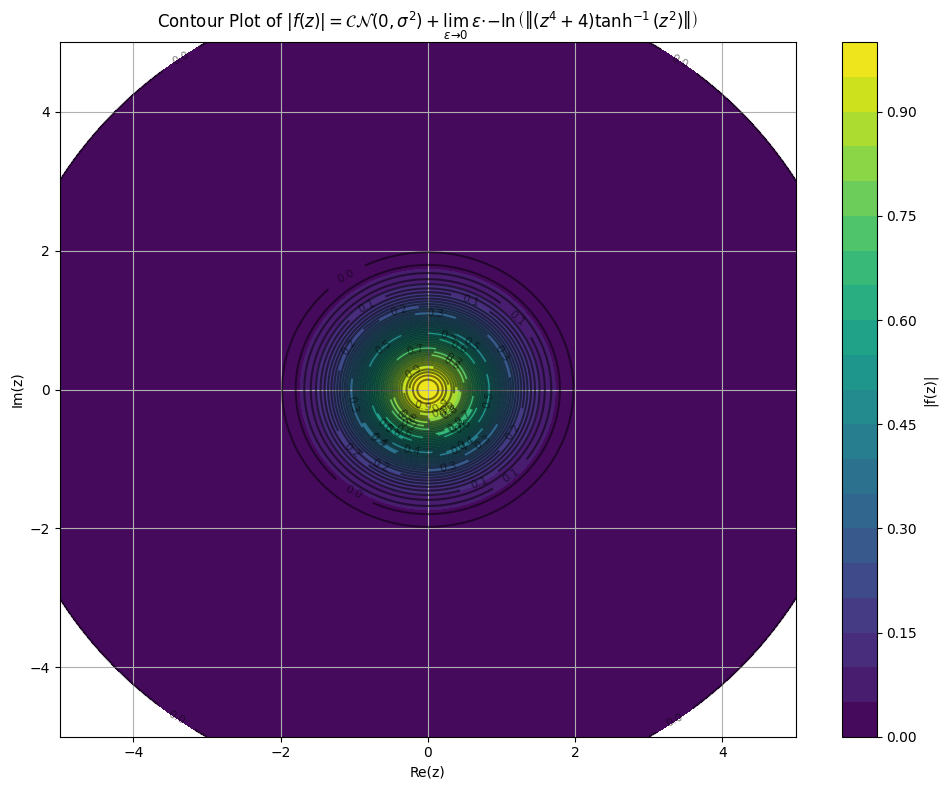

In [8]:
# Let's check that the critical values remain the same even when first multiplying by epsilon


def f3(z):
    return epsilon * f(z)


f_values = f2(Z, f3)
plt.title(r'Contour Plot of $|f(z)| = \mathcal{CN}(0, \sigma^2) + \lim_{\epsilon \to 0}{\:\epsilon \cdot -\ln\left(\left\|(z^4 + 4)\tanh^{-1}(z^2)\right\|\right)}$')
contour_plot(f_values, X, Y)

print('\nCritical values should remain when taking the limit')
print_crit_values(functools.partial(f2, f=f3), 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

/home/tophurt/Desktop/Thesis/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


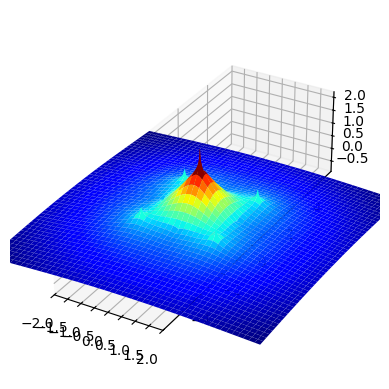

R: (1+0j) |-> (0.26190198742230747+0j) (-1+0j) |-> (0.26190198742230747+0j) 0j |-> (inf+0j)
I: 1j |-> (0.26190198742230747+0j) (-0-1j) |-> (0.26190198742230747+0j)
Z: (1+1j) |-> (0.028204306561910295+0j) (-1+1j) |-> (0.028204306561910295+0j) (-1-1j) |-> (0.028204306561910295+0j) (1-1j) |-> (0.028204306561910295+0j)


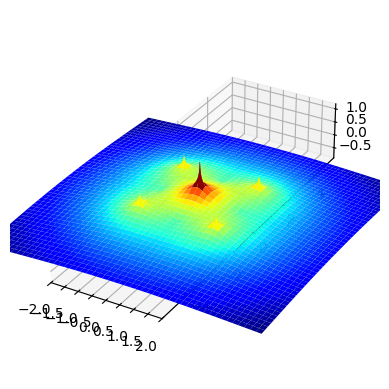

In [9]:
"""
By converting to an auxillary analytic function, so that f(z) is no longer meromorphic, we can:

(1) Use Jensen's formula, which relates the definition of the complex logarithm to it's poisson expansion
(2) Use the harmonic mean-disc value theorem to compute 
(3) Re-normalize the distribution to its area-mean log
"""

def f4(z):
    return f(1/np.sqrt(2) * z) / 8


U4 = f2(X + 1j * Y, f4)
U5 = f4(X + 1j * Y)
proj_plot(X, Y, U4)
plt.show()
proj_plot(X, Y, U5)


print_crit_values(functools.partial(f2, f=f4), 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

Weight's |-> [1.59683976e+00 1.59576912e+00 1.59469848e+00 1.59576912e+00
 1.59683976e+00 1.59576909e+00 1.59469821e+00 1.59576693e+00
 1.59682470e+00 1.59568036e+00 1.59425017e+00 1.59382798e+00
 1.58963281e+00 1.57281673e+00 1.53195218e+00 1.44833932e+00
 1.29841988e+00 1.07322126e+00 7.97349240e-01 5.22547866e-01
 2.98419882e-01 1.47429804e-01 6.27462956e-02 2.29523917e-02
 7.20694849e-03 1.94114096e-03 4.48313100e-04 8.87638288e-05
 1.50651361e-05 2.19162733e-06 2.73276969e-07 2.92061634e-08]

Impulse response |-> [[ 2.43201679e-04 -1.75140842e-04 -1.30676179e-05  2.63137857e-04
 -4.54863577e-04  4.14742145e-04 -4.50464225e-05 -5.69950943e-04
  1.10647947e-03 -1.11416734e-03] ... [ 3.64439338e-26 -1.50490673e-27 -2.44230159e-26  3.34280081e-26
 -1.01233149e-27  4.18029648e-29  6.78417107e-28 -9.28555779e-28
  2.81203192e-29 -1.16119347e-30]]

 Some stats:
	 sum of H |-> 0.9800160425163766


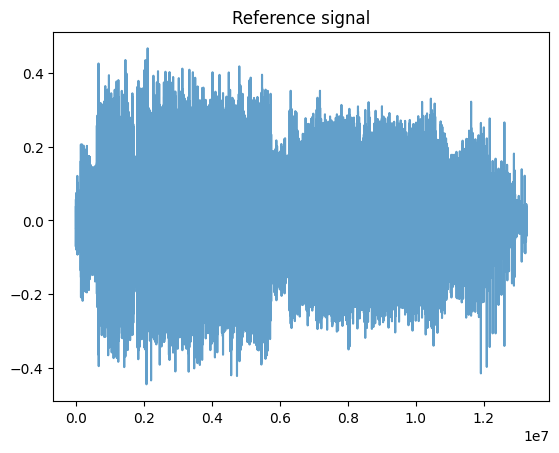

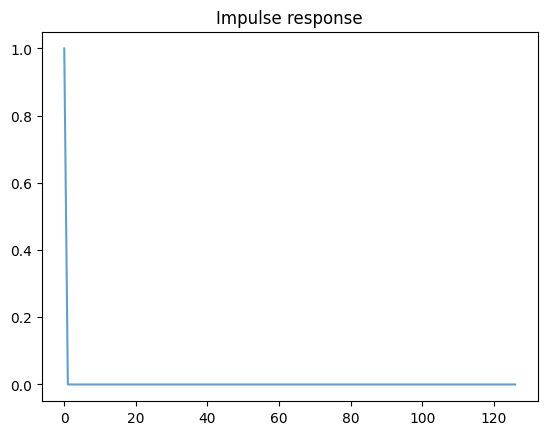

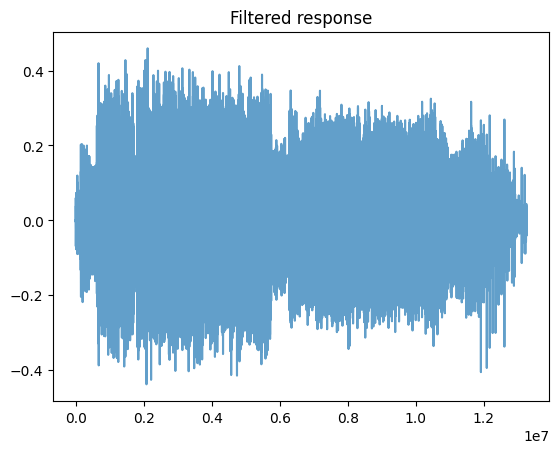

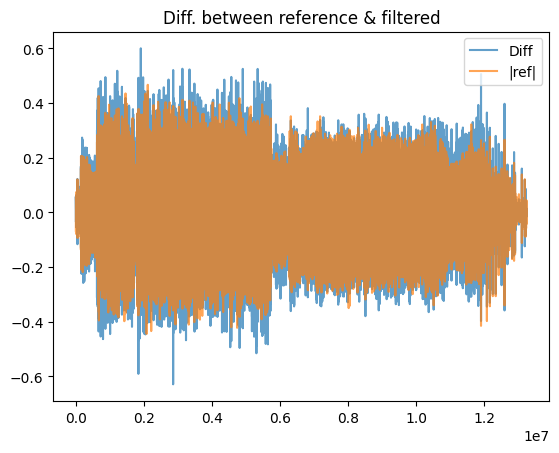

In [20]:
import os
import scipy.signal as signal
import librosa
import matplotlib.pyplot as plt


EXAMPLE_RECORDING = os.path.join(os.path.dirname(os.getcwd()), 'resources', 'walrus.flac')
N_TAPS = 64
N_FREQS = 127 # Example number of frequencies in a bin (smaller = better). It is possible for this to be graded on an EQ function that gates certain frequencies more
N = 32 # Example number of bands
SIGMA = 0.5  # Bandwidth parameter
NORMALIZE_WEIGHTS = False
CAUSAL = True
DC_GAIN_TO_UNITY = False # Having substantial low-frequency (DC/near-DC) content => gain at ω=0 to 1 will keep overall levels reasonable
SCALE_USING_RMS = False
USE_LOG = True

MAX_INT = 2**31 - 1
MIN_INT = -2**31

audio, sr = librosa.load(EXAMPLE_RECORDING, sr=None)


def f_z(z, ignore_log=False, clamp_to_32=False):
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.arctanh(z**2) if ignore_log else f(z)
        if clamp_to_32:
            return np.nan_to_num(result, posinf=MAX_INT, neginf=MIN_INT) 
        return np.nan_to_num(result)
    

# Define poles from f(z) singularities
r = 1 - epsilon if CAUSAL else np.sqrt(2)
poles = np.array([1, -1, 1j, -1j, 1+1j, 1-1j, -1+1j, -1-1j])
poles = r * (poles / np.linalg.norm(poles))

# Frequency bin centers and Gaussian weights
omega_k = np.linspace(0, 2*np.pi, N, endpoint=False)
weights = np.array([np.sum(np.exp(-(np.angle(poles) - w)**2 / (2*SIGMA**2))) for w in omega_k])

if NORMALIZE_WEIGHTS:
    weights /= np.max(weights)

print(f'Weight\'s |-> {weights}\n')

# Construct numerator polynomial by sampling f(e^{jω}) * Gaussian weights
omega = np.linspace(0, 2*np.pi, N_FREQS, endpoint=False)
z = np.exp(1j * omega)

F_vals = f_z(z, ignore_log=not USE_LOG)
# F_vals = f_z(z, ignore_log=True)
# F_vals = np.ones(N_FREQS, dtype=float)

G_vals = np.zeros_like(F_vals, dtype=float)
for k in range(N):
    G_vals += weights[k] * np.exp(-(omega - omega_k[k])**2 / (2*SIGMA**2))

with np.errstate(divide='ignore', over='ignore'):
    H_freq = np.abs(F_vals * G_vals)
    freq = np.linspace(0, sr / 2, N_FREQS)
    gain = H_freq
    gain = np.clip(gain, -1.0, 1.0)

# Fit a FIR numerator to approximate H_freq over frequencies
b = signal.firwin2(N_TAPS + 1, freq, gain, fs=sr)
a = np.poly(poles)  # coefficients of D(z) = ∏ (z - p)

if USE_LOG:
    a[5] = 0 # The term of 4th degree is cancelled with f(z)

if DC_GAIN_TO_UNITY:
    H0 = np.polyval(b, 1) / np.polyval(a, 1)
    b /= H0

filtered = signal.lfilter(b, a, audio)

if SCALE_USING_RMS:
    rms_orig = np.sqrt(np.mean(audio**2))
    rms_filtered = np.sqrt(np.mean(filtered**2))
    peak_orig = np.max(np.abs(audio))
    peak_filt = np.max(np.abs(filtered))
    filtered *= (peak_orig / (peak_filt + epsilon))

# Print impulse response of filter
impulse = np.zeros(N_FREQS); impulse[0] = 1
h = signal.lfilter(b, a, impulse)
print(f'Impulse response |-> [{h[:10]} ... {h[-10:]}]')

# Find the diff
diff = audio - filtered
print(f'\n Some stats:\n\t sum of H |-> {np.sum(h)}')

plt.title('Reference signal')
plt.plot(audio, alpha=0.7, label='Original')
plt.show()
plt.title('Impulse response')
plt.plot(impulse, alpha=0.7, label='Impulse')
plt.show()
plt.title('Filtered response')
plt.plot(filtered, alpha=0.7, label='Filtered')
plt.show()
plt.title('Diff. between reference & filtered')
plt.plot(diff, alpha=0.7, label='Diff')
plt.plot(audio, alpha=0.7, label='|ref|')
plt.legend(loc='upper right')
plt.show()

In [12]:
"""
Now consider we have 2 'metrics' encoded in 2 unit vectors.

To compute how well the metrics align we can find their dot product i.e. m_1,1 . m_2,1
And because we are dealing in complex coordinates we can find another i.e. m_1,2 . m_2,2
Then we can embed the complex number z = k * [(m_1,1 . m_2,1) + (m_1,2 . m_2,2)i]

I.e. Z = k * M * [1, i]
where M = 
[
    m_1^T,1, m_2,1
    m_1^T,2, m_2,2
]

Consider this:
If m1,1 . m2,1 is = -1, 1 ~or~ m1,2 . m2,2 is = -1, 1 [our number goes to infinity.

[*] This is because the combination of any 2 metrics that are strongly correlated (irrespective of sign)
should represent a global maxima

If m1,1 . m2,1 = 0 ~nand~ m1,2, . m2,2 = 0 our number goes to negative infinity

[*] This is because if either of the 2 metrics has no correlation at all this should represent a global minima

Finally, there is a special case at the origin. This is because the magnitude of the complex vector is 0 IFF
M = 0. I will return back to what this magnitude means, but just know for now it is chosen S.T values closer to the origin
are graded higher on a 3D-gaussian function.
"""

import sympy as sp
from pylatex import Document, Math, NoEscape, NewLine


eqns = []

# Previously discussed function definitions
Z_symb = sp.Symbol('Z', complex=True)
poles = sp.Function('f')(Z_symb)

# Vector, matrix eqn's
k = sp.symbols('k')
m11 = sp.MatrixSymbol('m_{1,1}', 2, 1)
m21 = sp.MatrixSymbol('m_{2,1}', 2, 1)
m12 = sp.MatrixSymbol('m_{1,2}', 2, 1)
m22 = sp.MatrixSymbol('m_{2,2}', 2, 1)
comp_unit_vec = sp.Matrix([[1], [1j]])

M = sp.Matrix([
    [sp.Transpose(m11) * m21],
    [sp.Transpose(m12) * m22]
])

poles_filter = sp.Lambda(Z_symb, -sp.ln(
        sp.Abs(
            (Z_symb**4 + 4) * sp.atanh(Z_symb**2)
        )
))

# Latex-ify
latex_comp_unit_vec = sp.latex(sp.nsimplify(comp_unit_vec))

latex_M = sp.latex(M)

latex_M_comp = sp.latex(
    sp.nsimplify(M.dot(comp_unit_vec))
)
latex_M_comp = latex_M_comp.replace(r'\left[', r'\begin{pmatrix}') \
             .replace(r'\right]', r'\end{pmatrix}')

latex_poles_filter = sp.latex(
    poles_filter(Z_symb)
)


# All equations here
eqns.append(('$$', 'Basic representation of pole filter function'))

# Eqn for M
eqns.append(r'\text{Because the function is }')
eqns.append((False, NewLine()))
eqns.append('Z = ')
eqns.append(latex_M_comp)
eqns.append(' = ')
eqns.append(latex_M)
eqns.append(latex_comp_unit_vec)

# Eqn for pole filter function
eqns.append((False, NewLine()))
eqns.append('\mathcal{F}(Z) = ')
eqns.append(latex_poles_filter)

eqns.append('$$')

eqns.append(('$$', 'Deriving the renter\'s metric'))
eqns.append(r'\text{}')
eqns.append('$$')


def format_eqns(eqns: list, markdown: bool = False):
    eqns_formatted = []
    for eqn in eqns:

        if isinstance(eqn, tuple):
            match eqn[0]:
                case '$$':
                    if markdown:
                        eqns_formatted.append(NoEscape(f'## {eqn[1]}'))
                    else:
                        eqns_formatted.append(NoEscape(f'\section {{{eqn[1]}}}'))
                    eqns_formatted.append(NoEscape('$$'))
                    continue
                case False:
                    eqns_formatted.append(eqn[1])
                    continue
                case _:
                    assert False, 'Unreachable case'

        eqns_formatted.append(NoEscape(eqn))
        
    return eqns_formatted


eqns = format_eqns(eqns, markdown=True)
doc = Document(documentclass='standalone')
doc.append(Math(data=eqns))

In [13]:
import re
from IPython.display import display, Markdown


def display_equations(depth=None):
    latex_str = doc.dumps()
    if depth is None:
        matches = re.finditer(r'(#{1,2}.+?)\s*\$\$(.*?)\$\$',
                               latex_str, re.DOTALL)
    
    for match in matches:
        section_title = match.group(1)
        equation = match.group(2)
        markdown_content = f'{section_title}\n\n$$\n{equation}\n$$'
        display(Markdown(markdown_content))


display_equations()

## Basic representation of pole filter function

$$
 \text{Because the function is } \newline Z =  m_{1,1}^{T} m_{2,1} + i m_{1,2}^{T} m_{2,2}  =  \left[\begin{matrix}m_{1,1}^{T} m_{2,1}\\m_{1,2}^{T} m_{2,2}\end{matrix}\right] \left[\begin{matrix}1\\1.0 i\end{matrix}\right] \newline \mathcal{F}(Z) =  - \log{\left(\left|{\left(Z^{4} + 4\right) \operatorname{atanh}{\left(Z^{2} \right)}}\right| \right)} 
$$

## Deriving the renter's metric

$$
 \text{} 
$$